# EURUSD Backtesting Example Notebook
**This notebook is for education purposes. Please do not use any trading strategies on your trading account.**


**Trading can be risky. Please consult with your financial advisor before starting any investment decision. We are not liable for any loss caused, whether due to negligence or otherwise arising from the use of, reliance on, the information provided directly or indirectly, by useing of this notebook**


## Disclaimer
Before reading this notebook, please make sure that you not the following important information:
### Do your Own Research
Our content is intended to be used and must be used for education purposes only. It is very important to do your own analysis before making any investment based on your own personal circumstances. You should take independent financial advice from a professional in connection with, or independently research and verify, and information that you find on this notebook and wish to rely upon, whether for the purpose of making an investment decision or otherwise.

In [1]:
from Strategies import *

### Read data from MT5 Terminal
Read EURUSD data from forex broker. You can open a demo trading account by using this link [FXTM](http://www.forextime.com/zh-tw/register/investors?raf=fa060479)

In [2]:
# Initialize MT5 terminal
mt5.initialize()

# Output the data with history_data function
data = history_data(symbol="EURUSD", period=mt5.TIMEFRAME_H1, ticks=200000)

In [3]:
data = data.dropna(how='any', axis=0).reset_index(drop=True)
data.head()

,time,open,high,low,close,tick_volume,spread,real_volume,SMA_1,SMA_2,VOL,Bias,SMA_Change,vol_change,highest,lowest,K,D
0,1999-01-05 16:00:00,1.1781,1.1793,1.1773,1.1784,414,50,0,1.179957,1.180813,330.2,-0.002044,0.999540,1.142165,1.1823,1.1771,25.000000,23.827059
1,1999-01-05 17:00:00,1.1785,1.1791,1.1752,1.1760,372,50,0,1.179057,1.180717,341.7,-0.003995,0.999237,1.034827,1.1809,1.1752,14.035088,20.704004
2,1999-01-05 18:00:00,1.1759,1.1781,1.1750,1.1764,330,50,0,1.178257,1.180627,346.6,-0.003580,0.999321,1.014340,1.1799,1.1750,28.571429,22.535505
3,1999-01-05 19:00:00,1.1765,1.1775,1.1762,1.1767,179,50,0,1.177729,1.180523,330.4,-0.003239,0.999551,0.953260,1.1795,1.1750,37.777778,26.794765
4,1999-01-05 20:00:00,1.1769,1.1785,1.1763,1.1778,130,50,0,1.177514,1.180510,318.1,-0.002296,0.999818,0.962772,1.1793,1.1750,65.116279,43.821828


The data set include that 1H historical data between 1999/1/5 to 2021/12/20. There are 141,646 rows of data in the dataset with 18 different columns.
- Time: Data Time
- Open: Open price of the tick
- High: High price of the tick
- Low: Low price of the tick
- Close: Close price of the tick
- Tick Volume: The trading volume of the tick
- Spread: The difference between buy and sell price
- SMA_1: Simple moving average 1
- SMA_2: Simple moving average 2
- VOL: Average volume change
- Bias: The difference between close and SMA_1
- SMA_change: SMA change ratio
- vol_change:
- highest: The highest price in a period of time
- lowest: The lowest price in a period of time
- K:
- D:

In [4]:
print(f'Data period {data["time"].iloc[0]} ~ {data["time"].iloc[-1]}')
print(f'Length of the data {len(data)}')
print(f'Length of the columns {len(data.columns)}')
print(f'Columns: {data.columns}')

Data period 1999-01-05 16:00:00 ~ 2021-12-20 07:00:00
Length of the data 141647
Length of the columns 18
Columns: Index(['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread',
       'real_volume', 'SMA_1', 'SMA_2', 'VOL', 'Bias', 'SMA_Change',
       'vol_change', 'highest', 'lowest', 'K', 'D'],
      dtype='object')


There is no null value in the dataset

In [5]:
print(data.isnull().sum())

time           0
open           0
high           0
low            0
close          0
tick_volume    0
spread         0
real_volume    0
SMA_1          0
SMA_2          0
VOL            0
Bias           0
SMA_Change     0
vol_change     0
highest        0
lowest         0
K              0
D              0
dtype: int64


#### Check Random Walk
Random walk is critical for the time series model if the data set is a random walk, which might be hard to predict the future trend. 

Hence, let assume that if the data is not a random walk as the null hypothesis. Using Augmented Dickey-Fuller test to check the data is a random walk or not

$H_0$ = Not Random Walk, $H_1$ = Random Walk

As a result, we can see that the p-value is 0.425, which does not have a significant difference. Hence, reject the null hypothesis $(H_0)$, this data is a random walk data.

In [6]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(data['close'])
print(f"p-value: {results[1]}")

p-value: 0.4255106050089637


#### Implement the first strategy
The primary method of this strategy use reversal trading, with several indicators. Now, let's use the strategy on this data set for backtesting the performance.

In [20]:
result, history_trading = InitialStrategy(data)
final_data = data.merge(history_trading, how='inner', on='time')
final_data['label'] = np.where(final_data['profit'] < 0, 0, 1)
final_data.head()

,time,open,high,low,close,tick_volume,spread,real_volume,SMA_1,SMA_2,...,SMA_Change,vol_change,highest,lowest,K,D,price,type,profit,label
0,1999-01-06 04:00:00,1.1728,1.1737,1.1725,1.1734,32,50,0,1.174257,1.178717,...,0.999501,0.727605,1.1761,1.1718,37.209302,20.460089,1.1734,short,49,1
1,1999-01-06 14:00:00,1.1743,1.1759,1.1726,1.1729,434,50,0,1.174814,1.176683,...,0.999842,1.164912,1.1770,1.1726,6.818182,26.843434,1.1729,long,-849,0
2,1999-01-07 04:00:00,1.1635,1.1648,1.1635,1.1644,37,50,0,1.162986,1.169560,...,1.000209,0.665496,1.1648,1.1612,88.888889,83.122114,1.1644,short,-29,0
3,1999-01-07 13:00:00,1.1667,1.1672,1.1644,1.1647,386,50,0,1.165686,1.167860,...,1.000159,1.200126,1.1679,1.1644,8.571429,44.310134,1.1647,long,469,1
4,1999-01-07 15:00:00,1.1666,1.1698,1.1654,1.1694,432,50,0,1.166729,1.167457,...,1.000649,1.153536,1.1698,1.1627,94.366197,58.030491,1.1694,short,259,1


After using the first strategy, we can see that the captial fluctuate seriouly. Hence, the model can be improved.

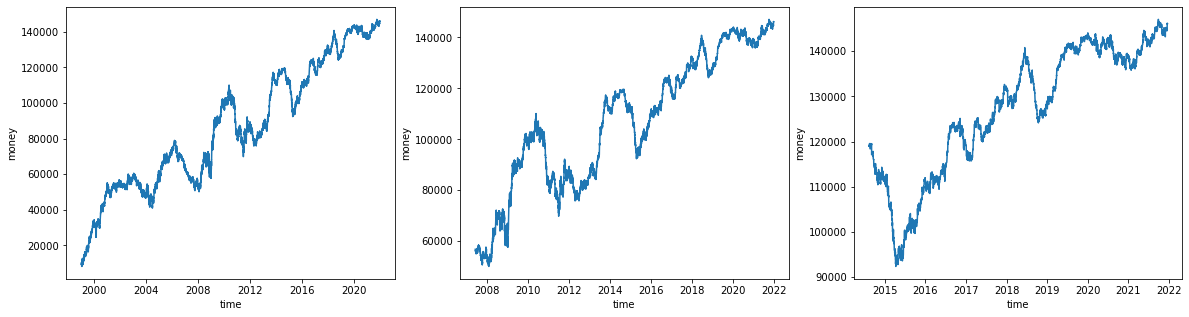

In [8]:
makePlot(final_data)

First, let's look at variables related to the simple moving average, which is Bias and SMA_Change rate. Besides, the change of volume might be meaningful. Here we use the histogram to see which values have a higher win rate and lower win rate. Label=0 is indicated as loss trade, and Label=1 is indicated as a winning trade.

As a result, we can see that there is no significant pattern on both Bias and SMA_change. However, vol_change shows a unique pattern when the value exceeds a specific value. So, let us look closer at the vol_change

<AxesSubplot:xlabel='vol_change', ylabel='Count'>

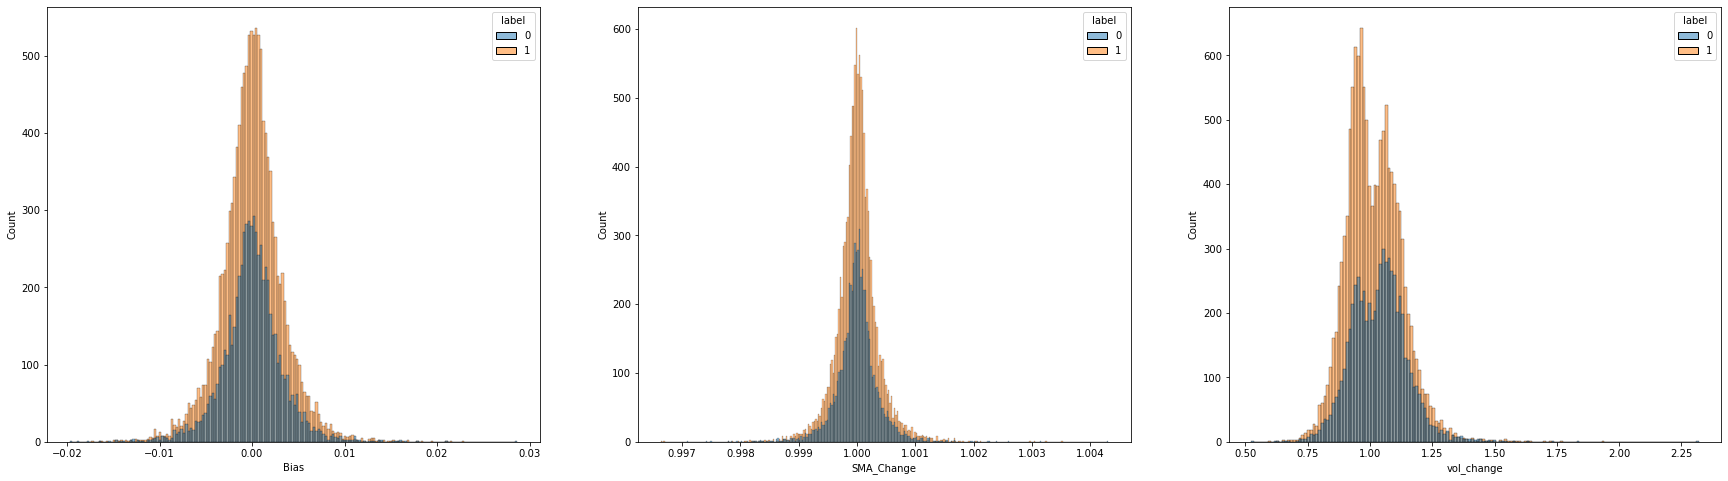

In [9]:
f, axes = plt.subplots(1, 3)
f.set_figheight(8)
f.set_figwidth(30)
sns.histplot(ax=axes[0], data=final_data, x='Bias', hue='label')
sns.histplot(ax=axes[1], data=final_data, x='SMA_Change', hue='label')
sns.histplot(ax=axes[2], data=final_data, x='vol_change', hue='label')

As a result, we can see that if the vol_change exceeds approximately 1.02, it will have a higher chance to lose rather than win. Hence, for the next version, I'll try to avoid trading if the vol_change exceed the threshold

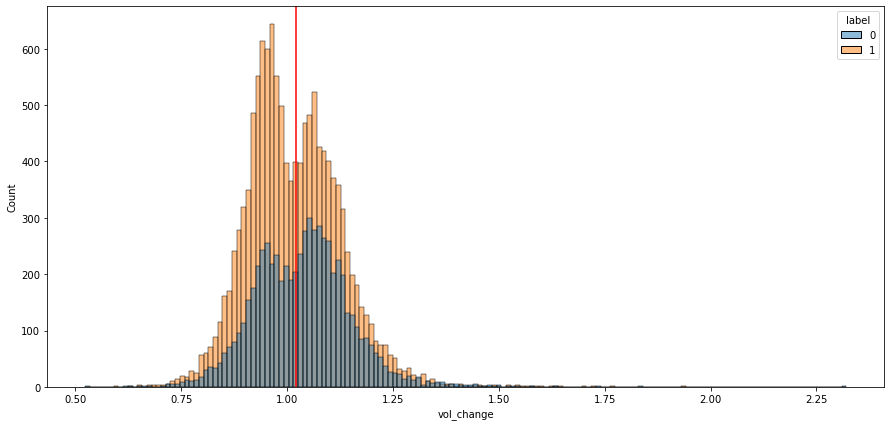

In [10]:
plt.figure(figsize=(15,7))
sns.histplot(data=final_data, x='vol_change', hue='label')
plt.axvline(1.02, color='r')

Next, let's look at the fluctuate related indicator, which is KDJ. Usually, short trade has a higher K value, and long trade has a lower K value. Hence, we need to observe the data separately

<AxesSubplot:title={'center':'Long Trade'}, xlabel='K', ylabel='Count'>

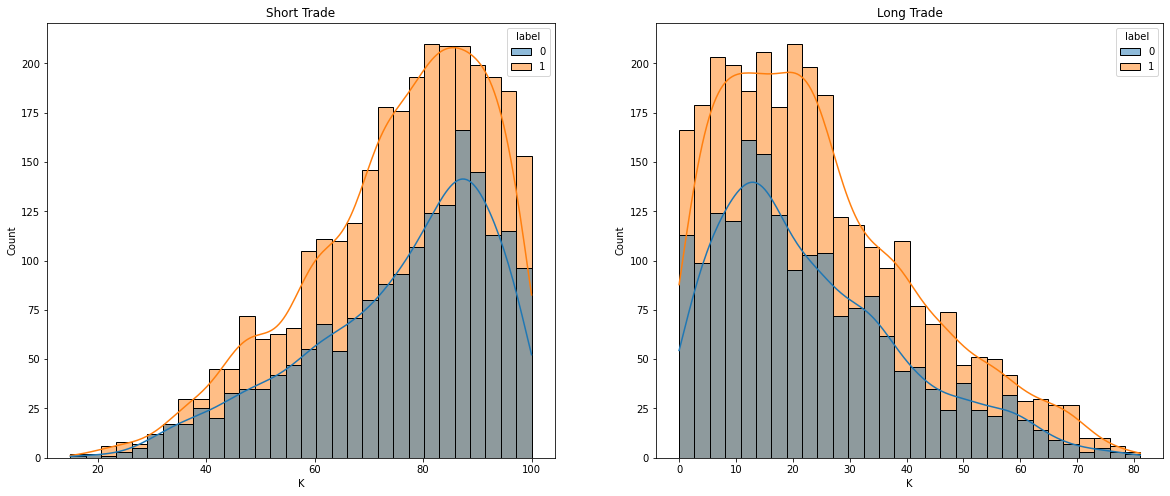

In [11]:
f, axes = plt.subplots(1, 2)
f.set_figheight(8)
f.set_figwidth(20)
axes[0].set_title('Short Trade')
sns.histplot(ax=axes[0], data=final_data[(final_data.vol_change > 1.02) & (final_data.type == 'short')], x='K', hue='label', kde=True)
axes[1].set_title('Long Trade')
sns.histplot(ax=axes[1], data=final_data[(final_data.vol_change > 1.02) & (final_data.type == 'long')], x='K', hue='label', kde=True)

In [12]:
my_kde = sns.histplot(ax=axes[0], data=final_data[(final_data.vol_change > 1.02) & (final_data.type == 'short')], x='K', hue='label', kde=True)
line_1 = my_kde.lines[0]
line_2 = my_kde.lines[1]
x1, y1 = line_1.get_data()
x0, y0 = line_2.get_data()

<AxesSubplot:>

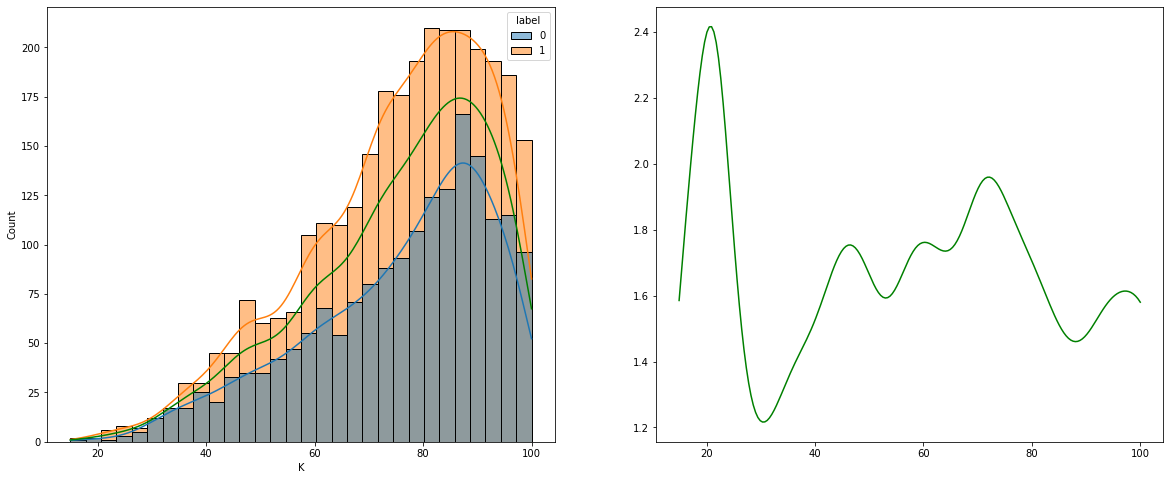

In [13]:
f, axes = plt.subplots(1, 2)
f.set_figheight(8)
f.set_figwidth(20)
sns.histplot(ax=axes[0], data=final_data[(final_data.vol_change > 1.02) & (final_data.type == 'short')], x='K', hue='label', kde=True)
sns.lineplot(ax=axes[0], x=x1, y=(y1 + y0)/2, color='g')
sns.lineplot(ax=axes[1], x=x1, y=(y1 /y0), color='g')


In [23]:
my_kde_long = sns.histplot(ax=axes[0], data=final_data[(final_data.vol_change > 1.02) & (final_data.type == 'long')], x='K', hue='label', kde=True)
line_1_long = my_kde_long.lines[0]
line_2_long = my_kde_long.lines[1]
x1l, y1l = line_1_long.get_data()
x0l, y0l = line_2_long.get_data()

<AxesSubplot:>

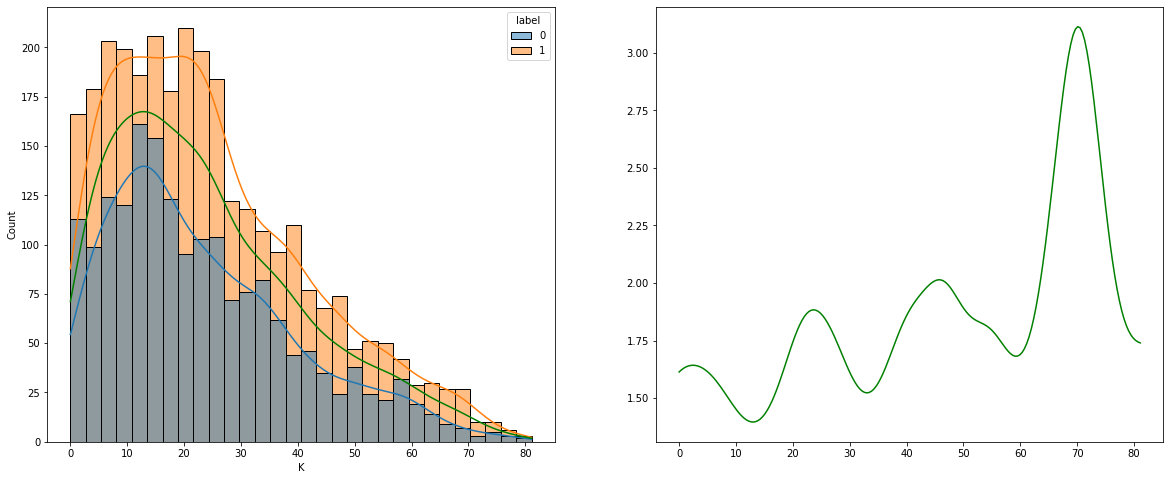

In [24]:
f, axes = plt.subplots(1, 2)
f.set_figheight(8)
f.set_figwidth(20)
sns.histplot(ax=axes[0], data=final_data[(final_data.vol_change > 1.02) & (final_data.type == 'long')], x='K', hue='label', kde=True)
sns.lineplot(ax=axes[0], x=x1l, y=(y1l + y0l)/2, color='g')
sns.lineplot(ax=axes[1], x=x1l, y=(y1l/y0l), color='g')


## Second Version 
- Setup vol change threshold and restrict the K value

In [16]:
result, history_trading = SecondStrategy(data)
final_data = data.merge(history_trading, how='inner', on='time')
final_data['label'] = np.where(final_data['profit'] < 0, 0, 1)

As a result, we can see that the capital had significantly increased after setting up the threshold.

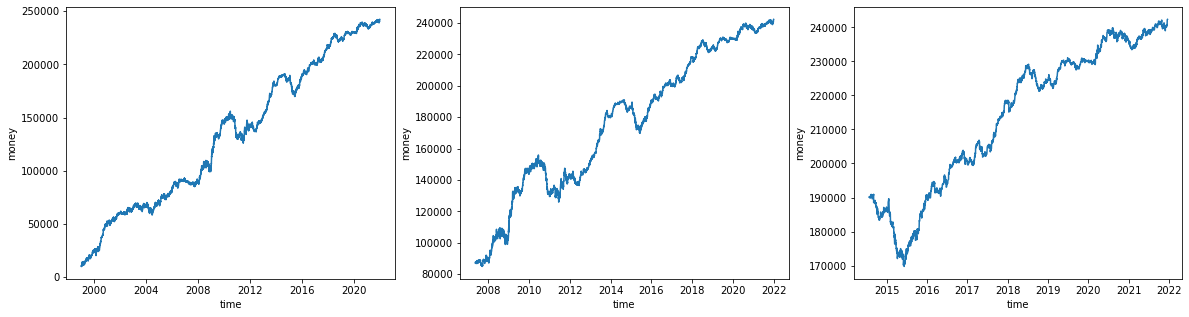

In [17]:
makePlot(final_data)

# Conclusion
In conclusion, we know that it is hard to predict the price of forex instruments. However, we can find the best timing with a higher win rate. Besides, volume and fluctuating type of indicator might be essential to predict the price. However, past performance is not represented future performance. Therefore, please do your research before trading on any financial instruments.

Our content is intended to be used and must be used for **education purposes only**. It is very important to do your own analysis before making any investment based on your own personal circumstances. You should take independent financial advice from a professional in connection with, or independently research and verify, and information that you find on this notebook and wish to rely upon, whether for the purpose of making an investment decision or otherwise.